In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pan
from nsepy import get_history
import matplotlib as mlt
import datetime as date
import datetime 
from datetime import date
import numpy as np

In [2]:
#end = datetime.date.today()
end = date(2021,9,25)
start = date(2020,1,1)

In [3]:
df= get_history('SBIN',start,end)

In [4]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-01,SBIN,EQ,333.75,334.70,335.95,332.15,335.0,334.45,334.03,17379320,5.805130e+14,99108,1850790,0.1065
2020-01-02,SBIN,EQ,334.45,334.50,339.85,333.35,338.8,339.30,336.81,20324236,6.845341e+14,123189,4239894,0.2086
2020-01-03,SBIN,EQ,339.30,337.95,337.95,332.00,334.0,333.70,335.08,21853208,7.322600e+14,139793,6309081,0.2887
2020-01-06,SBIN,EQ,333.70,331.70,331.70,317.70,318.4,319.00,322.03,35645325,1.147882e+15,280646,8731362,0.2450
2020-01-07,SBIN,EQ,319.00,324.45,327.00,315.40,317.9,318.40,320.38,50966826,1.632868e+15,310782,9993754,0.1961


In [5]:
df = df[['Open']]

<AxesSubplot:xlabel='Date'>

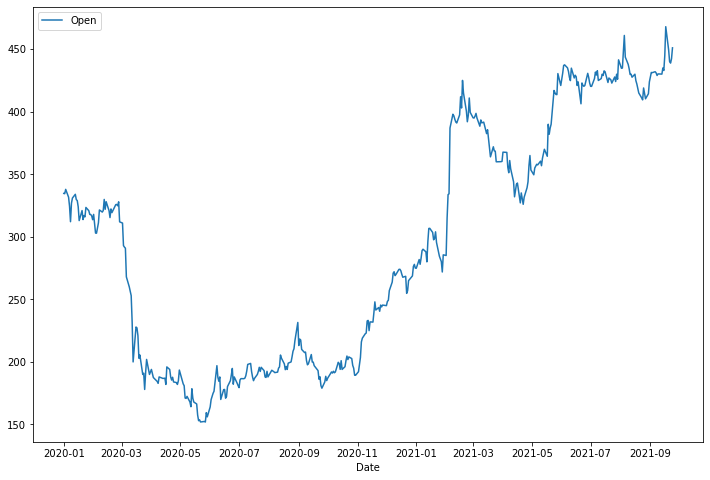

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

433

In [9]:
test_percent = 0.2   #spliting 10 % of data to test set

In [10]:
len(df)*test_percent # 10 percent = 50 records

86.60000000000001

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

346

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
len(train)

346

In [16]:
len(test)

87

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler()

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:

length = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [23]:
X,y = generator[0]

In [24]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.6691688]
Predict this y: 
 [[0.66843647]]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
# We're only using one feature in our time series
n_features = 1

In [27]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))


model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [32]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
345/345 [==============================] - 7s 6ms/step - loss: 0.0532 - val_loss: 0.0294
Epoch 2/20
345/345 [==============================] - 2s 6ms/step - loss: 0.0069 - val_loss: 7.9225e-04
Epoch 3/20
345/345 [==============================] - 2s 6ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 4/20
345/345 [==============================] - 2s 5ms/step - loss: 0.0011 - val_loss: 0.0044


In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

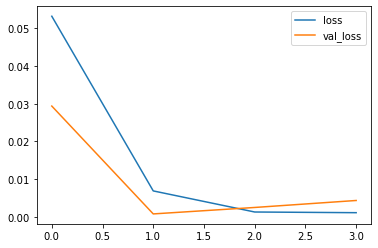

In [34]:
losses.plot()

In [50]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [51]:
true_predictions = scaler.inverse_transform(test_predictions)

In [52]:
true_predictions 

array([[3.97731724e+02],
       [4.06983260e+02],
       [4.18182642e+02],
       [4.31928379e+02],
       [4.49078128e+02],
       [4.70754179e+02],
       [4.98776609e+02],
       [5.36154544e+02],
       [5.88030537e+02],
       [6.63827223e+02],
       [7.82392509e+02],
       [9.86239981e+02],
       [1.38636577e+03],
       [2.32736956e+03],
       [5.01291570e+03],
       [1.29996921e+04],
       [3.48973117e+04],
       [9.40863069e+04],
       [2.54024220e+05],
       [6.86117609e+05],
       [1.85322266e+06],
       [5.00583599e+06],
       [1.35219133e+07],
       [3.65261931e+07],
       [9.86671281e+07],
       [2.66526976e+08],
       [7.19962963e+08],
       [1.94481872e+09],
       [5.25349322e+09],
       [1.41911359e+10],
       [3.83341820e+10],
       [1.03551235e+11],
       [2.79720556e+11],
       [7.55602698e+11],
       [2.04109190e+12],
       [5.51355317e+12],
       [1.48936327e+13],
       [4.02318292e+13],
       [1.08677324e+14],
       [2.93567533e+14],


In [53]:
test['Predictions'] = true_predictions

<ipython-input-53-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [54]:
test

,Open,Predictions
Date,,
2021-05-24,417.00,3.977317e+02
2021-05-25,415.10,4.069833e+02
2021-05-26,413.80,4.181826e+02
2021-05-27,413.70,4.319284e+02
2021-05-28,430.50,4.490781e+02
...,...,...
2021-09-20,449.40,1.059689e+33
2021-09-21,440.15,2.862513e+33
2021-09-22,438.90,7.732441e+33


<AxesSubplot:xlabel='Date'>

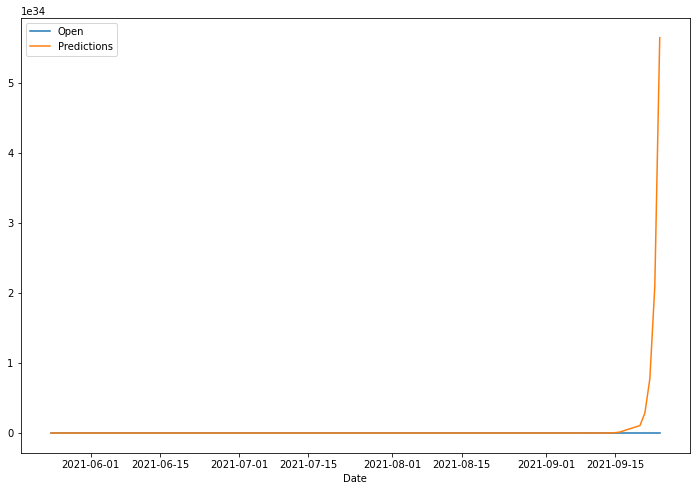

In [55]:
test.plot(figsize=(12,8))

In [56]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [57]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [58]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
421/421 [==============================] - 8s 11ms/step - loss: 0.0148
Epoch 2/8
421/421 [==============================] - 5s 11ms/step - loss: 0.0036
Epoch 3/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0023
Epoch 4/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0020
Epoch 5/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0018
Epoch 6/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0018
Epoch 7/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0015
Epoch 8/8
421/421 [==============================] - 4s 10ms/step - loss: 0.0013


In [59]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
forecast = scaler.inverse_transform(forecast)

In [61]:
forecast

array([[416.99862666],
       [422.15687344],
       [427.61470106],
       [432.91095296],
       [437.96869919],
       [442.90009537],
       [447.74557611],
       [452.46483701],
       [457.26132089],
       [462.11647078],
       [467.00889735],
       [471.92717344],
       [476.84753311],
       [481.77173439],
       [486.70606061],
       [491.64953508],
       [496.6015718 ],
       [501.5672495 ],
       [506.5490099 ],
       [511.53695594],
       [516.54017078],
       [521.56243091],
       [526.60539669],
       [531.66932857]])

In [63]:
forecast_index = pd.date_range(start='2021-09-20',periods=periods,freq='B')

In [64]:
forecast_index

DatetimeIndex(['2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05',
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21'],
              dtype='datetime64[ns]', freq='B')

In [65]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [66]:
forecast_df

,Forecast
2021-09-20,416.998627
2021-09-21,422.156873
2021-09-22,427.614701
2021-09-23,432.910953
2021-09-24,437.968699
2021-09-27,442.900095
2021-09-28,447.745576
2021-09-29,452.464837
2021-09-30,457.261321
2021-10-01,462.116471


<AxesSubplot:>

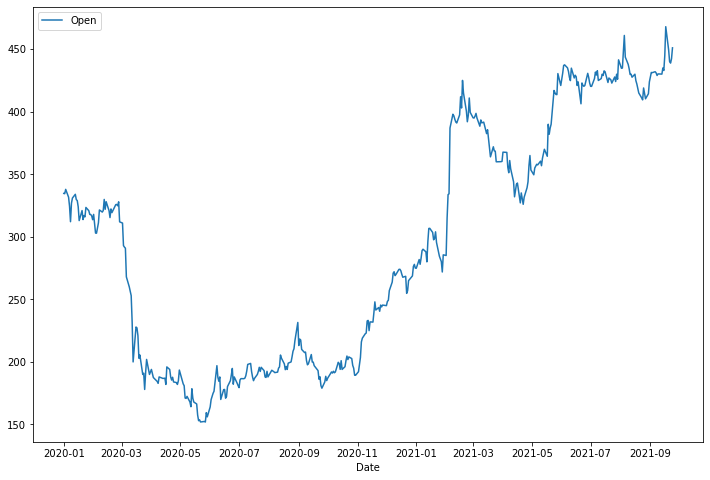

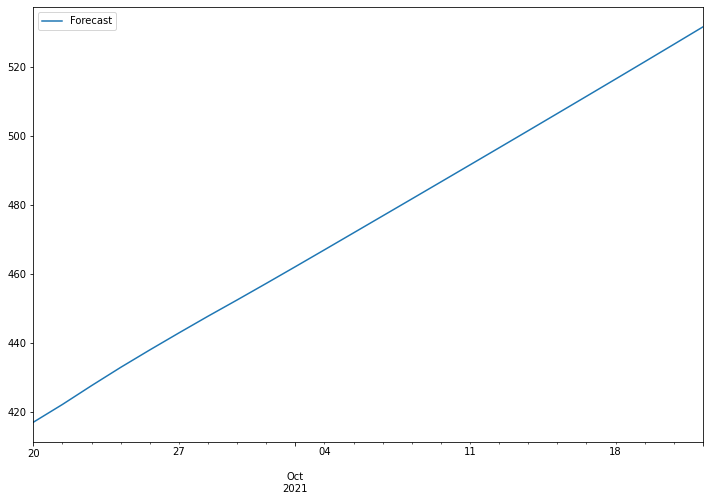

In [67]:
df.plot(figsize=(12,8))
forecast_df.plot(figsize=(12,8))

<AxesSubplot:>

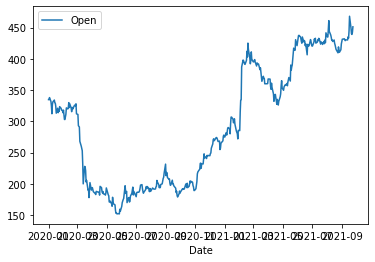

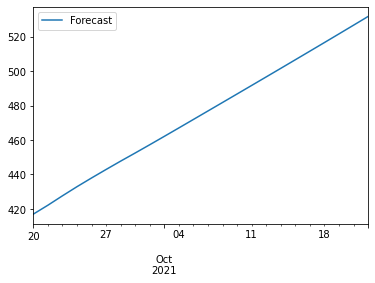

In [68]:
df.plot()
forecast_df.plot()